In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_excel("C:\\Users\\sanja\\Downloads\\Car_Sales_Data.xlsx", sheet_name=['Sheet1'])
df = df.get('Sheet1')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2020-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2020-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2020-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2020-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2020-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [3]:
df.shape

(23906, 16)

In [4]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23906 non-null  object        
 1   Date           23906 non-null  datetime64[ns]
 2   Customer Name  23906 non-null  object        
 3   Gender         23906 non-null  object        
 4   Annual Income  23906 non-null  int64         
 5   Dealer_Name    23906 non-null  object        
 6   Company        23906 non-null  object        
 7   Model          23906 non-null  object        
 8   Engine         23906 non-null  object        
 9   Transmission   23906 non-null  object        
 10  Color          23906 non-null  object        
 11  Price ($)      23906 non-null  int64         
 12  Dealer_No      23906 non-null  object        
 13  Body Style     23906 non-null  object        
 14  Phone          23906 non-null  int64         
 15  Dealer_Region  2390

#### Who buy more car male or female

In [7]:
df['Gender'].value_counts()
px.pie(names=df['Gender'].value_counts().index, values=df['Gender'].value_counts().values,
       title="Sales of car with gender")

In [8]:
px.line

<function plotly.express._chart_types.line(data_frame=None, x=None, y=None, line_group=None, color=None, line_dash=None, symbol=None, hover_name=None, hover_data=None, custom_data=None, text=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, orientation=None, color_discrete_sequence=None, color_discrete_map=None, line_dash_sequence=None, line_dash_map=None, symbol_sequence=None, symbol_map=None, markers=False, log_x=False, log_y=False, range_x=None, range_y=None, line_shape=None, render_mode='auto', title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure>

In [9]:
px.line(x=df.groupby(df['Date'])['Car_id'].count().index, y=df.groupby(df['Date'])['Car_id'].count().values,
        title="Sales of car month wise")

In [10]:
px.bar(x=df.groupby(df['Date'].dt.year)['Car_id'].count().index, 
       y=df.groupby(df['Date'].dt.year)['Car_id'].count().values,
       title="sales of car year wise")

In [11]:
px.bar(x=df['Customer Name'].value_counts().head(5).index,
       y=df['Customer Name'].value_counts().head(5).values,
       title="top 5 customers")

In [12]:
px.pie(names=df['Annual Income'].value_counts().head(5).index,
       values=df['Annual Income'].value_counts().head(5).values,
       title="Customers earning in dollar")

In [13]:
px.bar(x=df['Dealer_Name'].value_counts().head(7).index,
       y=df['Dealer_Name'].value_counts().head(7).values,
       title="Top dealers")

In [14]:
px.pie(names=df['Company'].value_counts().head(10).index,
       values=df['Company'].value_counts().head(10).values,
       title='Marcket share of top 10 companies')

In [15]:
px.bar(x=df['Model'].value_counts().head(5).index,
       y=df['Model'].value_counts().head(5).values,
       title='top 5 models')

<Axes: ylabel='Engine'>

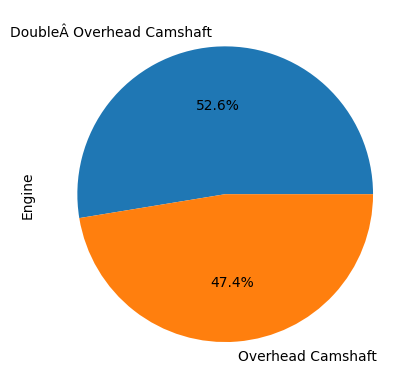

In [16]:
df['Engine'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='Transmission'>

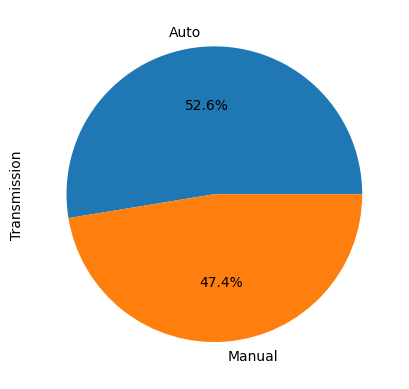

In [17]:
df['Transmission'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='Color'>

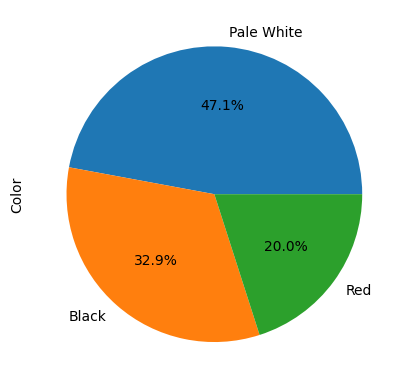

In [18]:
df['Color'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [19]:
pd.crosstab(index=[df['Gender']],columns=[df['Color']])

Color,Black,Pale White,Red
Gender,,,
Female,1653,2448,1007
Male,6204,8808,3786


In [20]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2020-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2020-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2020-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2020-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2020-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
